In [ ]:
#WEBSITE TUTORIAL: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [72]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier #import decision tree classifier
from sklearn.model_selection import train_test_split #import function to split into training and testing
from sklearn import metrics #import module for accuracy calculation
from sklearn.utils import class_weight #import module to balance classes weight 

#import moodules and libraries to print the Decision Tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [74]:
#create a variable that contains the names of the columns 
col_names = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol', 'quality']
#load dataset - winequality dataset published by University of California (http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/)
winequality = pd.read_csv("winequality.csv", names=col_names, header=1) #load using pandas function

In [75]:
winequality #shows a preview of the dataset

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               6.3             0.300         0.34            1.60      0.049   
1               8.1             0.280         0.40            6.90      0.050   
2               7.2             0.230         0.32            8.50      0.058   
3               7.2             0.230         0.32            8.50      0.058   
4               8.1             0.280         0.40            6.90      0.050   
5               6.2             0.320         0.16            7.00      0.045   
6               7.0             0.270         0.36           20.70      0.045   
7               6.3             0.300         0.34            1.60      0.049   
8               8.1             0.220         0.43            1.50      0.044   
9               8.1             0.270         0.41            1.45      0.033   
10              8.6             0.230         0.40            4.20      0.035   
11              7.9             0.180         0.37            1.20      0.040   
12              6.6             0.160         0.40            1.50      0.044   
13              8.3             0.420         0.62           19.25      0.040   
14              6.6             0.170         0.38            1.50      0.032   
15              6.3             0.480         0.04            1.10      0.046   
16              6.2             0.660         0.48            1.20      0.029   
17              7.4             0.340         0.42            1.10      0.033   
18              6.5             0.310         0.14            7.50      0.044   
19              6.2             0.660         0.48            1.20      0.029   
20              6.4             0.310         0.38            2.90      0.038   
21              6.8             0.260         0.42            1.70      0.049   
22              7.6             0.670         0.14            1.50      0.074   
23              6.6             0.270         0.41            1.30      0.052   
24              7.0             0.250         0.32            9.00      0.046   
25              6.9             0.240         0.35            1.00      0.052   
26              7.0             0.280         0.39            8.70      0.051   
27              7.4             0.270         0.48            1.10      0.047   
28              7.2             0.320         0.36            2.00      0.033   
29              8.5             0.240         0.39           10.40      0.044   
...             ...               ...          ...             ...        ...   
4867            5.8             0.230         0.31            4.50      0.046   
4868            6.6             0.240         0.33           10.10      0.032   
4869            6.1             0.320         0.28            6.60      0.021   
4870            5.0             0.200         0.40            1.90      0.015   
4871            6.0             0.420         0.41           12.40      0.032   
4872            5.7             0.210         0.32            1.60      0.030   
4873            5.6             0.200         0.36            2.50      0.048   
4874            7.4             0.220         0.26            1.20      0.035   
4875            6.2             0.380         0.42            2.50      0.038   
4876            5.9             0.540         0.00            0.80      0.032   
4877            6.2             0.530         0.02            0.90      0.035   
4878            6.6             0.340         0.40            8.10      0.046   
4879            6.6             0.340         0.40            8.10      0.046   
4880            5.0             0.235         0.27           11.75      0.030   
4881            5.5             0.320         0.13            1.30      0.037   
4882            4.9             0.470         0.17            1.90      0.035   
4883            6.5             0.330         0.38            8.30      0.048   
4884            6.6             0.340

In [76]:
#identify dependent and independent variables
feature_variables = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol']
x = winequality[feature_variables] #independent variables
y = winequality.quality #dependent variable

In [77]:
#split dataset between training and test sets - 75% for training and 25% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [78]:
#create the model

classifier = DecisionTreeClassifier(class_weight='balanced') #creates a classifier

classifier = classifier.fit(x_train, y_train) #trains the classifier

prediction = classifier.predict(x_test) #predicts 

In [79]:
#measure accuracy

print "Accuracy:",metrics.accuracy_score(y_test, prediction), "-", metrics.accuracy_score(y_test, prediction)*100,"%"

print metrics.classification_report(y_test, prediction)

Accuracy: 0.6326530612244898 - 63.26530612244898 %
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         5
          4       0.43      0.40      0.41        48
          5       0.67      0.69      0.68       382
          6       0.66      0.67      0.66       535
          7       0.60      0.57      0.58       213
          8       0.38      0.36      0.37        42
          9       0.00      0.00      0.00         0

avg / total       0.63      0.63      0.63      1225



dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.261929 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.261929 to fit



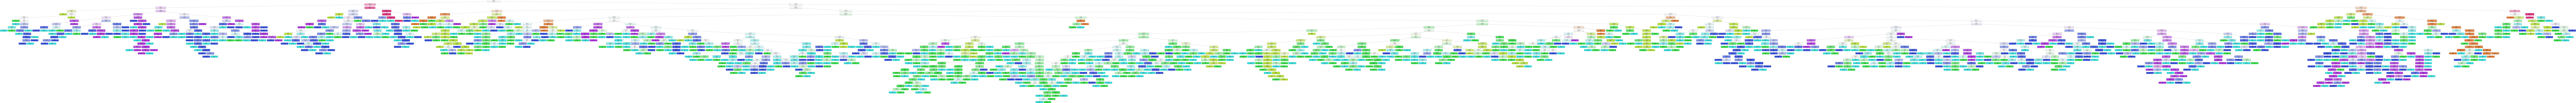

In [80]:
#Print the Decision Tree and save the image as a png
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_variables, class_names=['3','4','5','6','7','8','9'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('wine_quality.png')
Image(graph.create_png())